In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets

plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

In [13]:
from utils_2 import update_params, predict

In [14]:
def load_dataset():
    np.random.seed(1)
    X_train, Y_train = sklearn.datasets.make_circles(n_samples=300, noise=0.05)
    np.random.seed(2)
    X_test, Y_test = sklearn.datasets.make_circles(n_samples=100, noise=0.05)
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, s=40, cmap=plt.cm.Spectral)
    X_train = X_train.T
    Y_train = Y_train.reshape((1, Y_train.shape[0]))
    X_test = X_test.T
    Y_test = Y_test.reshape((1, Y_test.shape[0]))
    
    return X_train, Y_train, X_test, Y_test

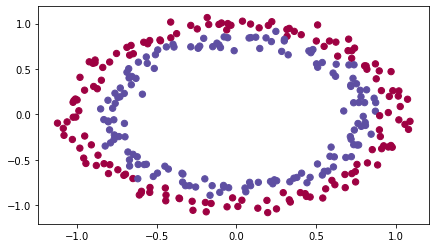

In [15]:
X_train, Y_train, X_test, Y_test = load_dataset()

In [17]:
def model(X, Y, learning_rate=0.01, num_iter=15_000, print_cost=True, initialization="he"):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]
    
    if initialization == "zeros":
        params = init_params_zeros(layers_dims)
    elif initialization == "random":
        params = init_params_random(layers_dims)
    elif initialization == "he":
        params = init_params_he(layers_dims)
    
    for i in range(num_iter):
        A3, cache = forward_propagation(X, params)
        
        cost = compute_cost(A3, Y)
        
        grads = backprop(X, Y, cache)
        
        params = update_params(params, grads, learning_rate)
        
        if print_cost and i % 1000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
            costs.append(cost)

    plt.plot(costs)
    plt.ylabel("cost")
    plt.title("Learning rate: {}".format(learning_rate))
    plt.show()
    
    return params

In [20]:
def forward_propagation(X, params):
    W1 = params["W1"]
    b1 = params["b1"]
    W2 = params["W2"]
    b2 = params["b2"]
    W3 = params["W3"]
    b3 = params["b3"]
    
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
    cache = (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3)
    
    return A3, cache

In [43]:
def backprop(X, Y, cache):
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = 1./m * (A3 - Y) # backprop sigmoid
    dW3 = np.dot(dZ3, A2.T)
    db3 = np.sum(dZ3, axis=1, keepdims=True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0)) # backprop relu
    dW2 = np.dot(dZ2, A1.T)
    db2 = np.sum(dZ2, axis=1, keepdims=True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = np.dot(dZ1, X.T)
    db1 = np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {
        "dZ3":dZ3, "dW3":dW3, "db3":db3,
        "dZ2":dZ2, "dA2":dA2, "dW2":dW2, "db2":db2,
        "dZ1":dZ1, "dA1":dA1, "dW1":dW1, "db1":db1
    }
    
    return grads

In [47]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

In [48]:
def compute_cost(A3, Y):
    m = Y.shape[1]
    logprobs = np.multiply(-np.log(A3), Y) + np.multiply(-np.log(1 - A3), 1 - Y)
    loss = (1./m) * np.nansum(logprobs)
    
    return loss

In [ ]:
def predict_dec(params, X):
    A3, cache = forward_propagation(X, params)
    preds = (A3 > 0.5)
    return preds

# Zero initialization

In [60]:
def init_params_zeros(layers_dims):
    params = {}
    L = len(layers_dims)
    for l in range(1, L):
        params["W"+str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        params["b"+str(l)] = np.zeros((layers_dims[l], 1))
    return params

In [61]:
params = init_params_random([3, 2, 1])
print("W1 = " + str(params["W1"]))
print("b1 = " + str(params["b1"]))
print("W2 = " + str(params["W2"]))
print("b2 = " + str(params["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


Cost after iteration 0: 0.6931471805599453
Cost after iteration 1000: 0.6931471805599453
Cost after iteration 2000: 0.6931471805599453
Cost after iteration 3000: 0.6931471805599453
Cost after iteration 4000: 0.6931471805599453
Cost after iteration 5000: 0.6931471805599453
Cost after iteration 6000: 0.6931471805599453
Cost after iteration 7000: 0.6931471805599453
Cost after iteration 8000: 0.6931471805599453
Cost after iteration 9000: 0.6931471805599453
Cost after iteration 10000: 0.6931471805599455
Cost after iteration 11000: 0.6931471805599453
Cost after iteration 12000: 0.6931471805599453
Cost after iteration 13000: 0.6931471805599453
Cost after iteration 14000: 0.6931471805599453


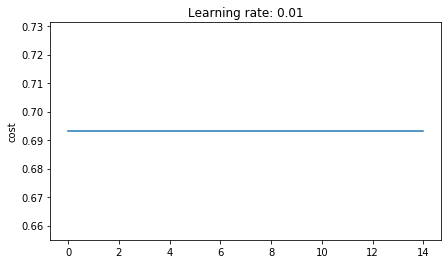

On the train set:
Accuracy: 0.49999999999999994
On the test set:
Accuracy: 0.5


In [62]:
params = model(X_train, Y_train, initialization = "zeros")
print ("On the train set:")
preds_train = predict(X_train, Y_train, params)
print ("On the test set:")
preds_test = predict(X_test, Y_test, params)

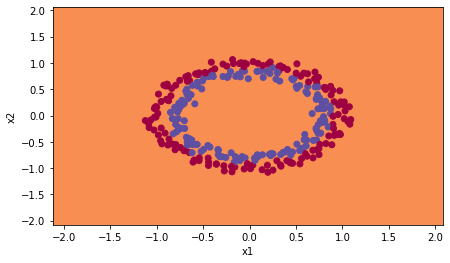

In [63]:
from utils import plot_decision_boundary

plot_decision_boundary(lambda x: predict_dec(params, x.T), X_train, Y_train)

# Random initialization

In [64]:
def init_params_random(layers_dims):
    np.random.seed(3)
    params = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        params["W"+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * 10
        params["b"+str(l)] = np.zeros((layers_dims[l], 1))
        
    return params

In [65]:
params = init_params_random([3, 2, 1])
print("W1 = " + str(params["W1"]))
print("b1 = " + str(params["b1"]))
print("W2 = " + str(params["W2"]))
print("b2 = " + str(params["b2"]))

W1 = [[ 17.88628473   4.36509851   0.96497468]
 [-18.63492703  -2.77388203  -3.54758979]]
b1 = [[0.]
 [0.]]
W2 = [[-0.82741481 -6.27000677]]
b2 = [[0.]]


R:\Work\Anacond\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
R:\Work\Anacond\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until


Cost after iteration 0: inf
Cost after iteration 1000: 0.6250982793959966
Cost after iteration 2000: 0.5981216596703697
Cost after iteration 3000: 0.5638417572298645
Cost after iteration 4000: 0.5501703049199763
Cost after iteration 5000: 0.5444632909664456
Cost after iteration 6000: 0.5374513807000807
Cost after iteration 7000: 0.4764042074074983
Cost after iteration 8000: 0.39781492295092263
Cost after iteration 9000: 0.3934764028765484
Cost after iteration 10000: 0.3920295461882659
Cost after iteration 11000: 0.38924598135108
Cost after iteration 12000: 0.3861547485712325
Cost after iteration 13000: 0.384984728909703
Cost after iteration 14000: 0.3827828308349524


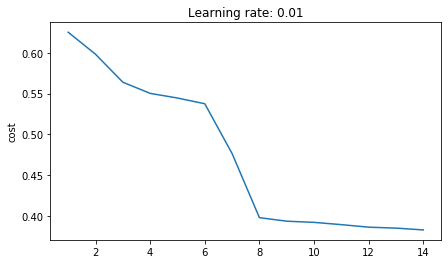

On the train set:
Accuracy: 0.4966666666666666
On the test set:
Accuracy: 0.49000000000000005


In [66]:
params = model(X_train, Y_train, initialization = "random")
print ("On the train set:")
preds_train = predict(X_train, Y_train, params)
print ("On the test set:")
preds_test = predict(X_test, Y_test, params)

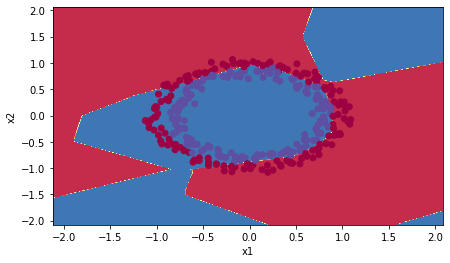

In [68]:
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_train, Y_train)

# He Initialization

In [83]:
def init_params_he(layers_dims):
    np.random.seed(3)
    
    params = {}
    L = len(layers_dims)
    
    for l in range(1, L):
        params["W"+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) * np.sqrt(2/layers_dims[l-1])
        params["b"+str(l)] = np.zeros((layers_dims[l], 1))
    
    return params

In [85]:
params = init_params_he([2, 4, 1])
print("W1 = " + str(params["W1"]))
print("b1 = " + str(params["b1"]))
print("W2 = " + str(params["W2"]))
print("b2 = " + str(params["b2"]))

W1 = [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 = [[0.]]


Cost after iteration 0: 0.8830537463419761
Cost after iteration 1000: 0.6879825919728063
Cost after iteration 2000: 0.6751286264523371
Cost after iteration 3000: 0.6526117768893807
Cost after iteration 4000: 0.6082958970572937
Cost after iteration 5000: 0.5304944491717495
Cost after iteration 6000: 0.4138645817071793
Cost after iteration 7000: 0.3117803464844441
Cost after iteration 8000: 0.23696215330322556
Cost after iteration 9000: 0.18597287209206828
Cost after iteration 10000: 0.15015556280371808
Cost after iteration 11000: 0.12325079292273548
Cost after iteration 12000: 0.09917746546525937
Cost after iteration 13000: 0.08457055954024274
Cost after iteration 14000: 0.07357895962677366


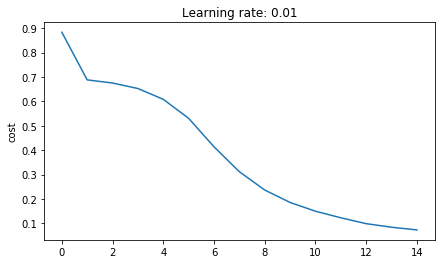

On the train set:
Accuracy: 0.4966666666666666
On the test set:
Accuracy: 0.49000000000000005


In [86]:
params = model(X_train, Y_train, initialization = "he")
# print ("On the train set:")
# preds_train = predict(X_train, Y_train, params)
# print ("On the test set:")
# preds_test = predict(X_test, Y_test, params)

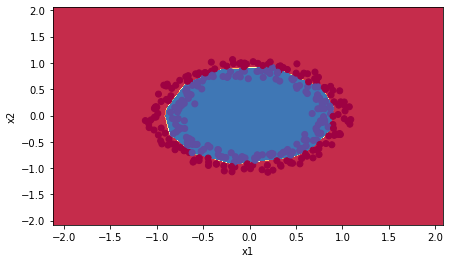

In [87]:
plot_decision_boundary(lambda x: predict_dec(params, x.T), X_train, Y_train)